## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and creating new columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1 Importing libraries and data and renaming columns


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [44]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [45]:
# Display of all columns in the dataset
pd.set_option('display.max_columns', None)

In [46]:
path = r'C:\Users\Martin ARAUJO\Documents\US Regional Sales Data'

In [47]:
# Import the Data Frame

df = pd.read_pickle(os.path.join(path, '02- Data', 'Prepared Data', 'DF_clean.pkl'))

#### Creating new interesting variables

In [48]:
df.head(1)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population


In [49]:
df['Gross_sales'] = df['Order Quantity'] * df['Unit Price']

In [50]:
df.head(1)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type,Gross_sales
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population,9815.5


In [51]:
df['Gross_cost'] = df['Order Quantity'] * df['Unit Cost']

In [52]:
df.head(1)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type,Gross_sales,Gross_cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population,9815.5,5005.905


In [53]:
df['Net_Profit'] = df['Gross_sales'] - df['Gross_cost']

In [54]:
df.head(1)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type,Gross_sales,Gross_cost,Net_Profit
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population,9815.5,5005.905,4809.595


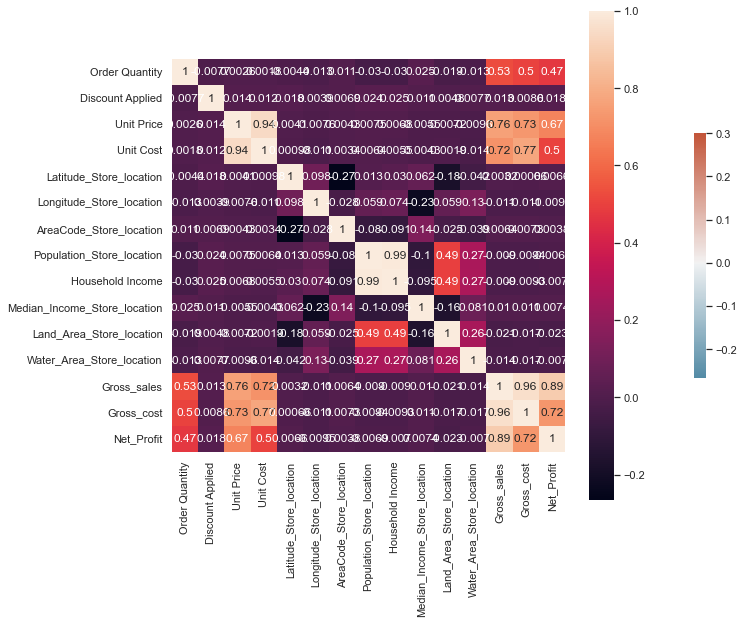

In [55]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
d = df

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(df.corr(), annot = True, ax = ax) 

What is calling my attention here, is that there is not a strong correlation between Order Quantity and Net Profit. There is not a null correlation between Discount appliend and order quantity / gross sales.
There is not any correlation between Gross sales and houshold income neither.

In [56]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type,Gross_sales,Gross_cost,Net_Profit
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population,9815.5,5005.905,4809.595
1,SO - 0005166,In-Store,WARE-PUJ1005,2019-08-23,2020-01-22,2020-01-28,2020-01-31,USD,5,0.050,1909.5,954.750,New Ltd,Buffalo,Erie County,NY,New York,City,42.88645,-78.87837,716,258071,110549,31918,104592941,31362925,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population,9547.5,4773.750,4773.750
2,SO - 0006713,In-Store,WARE-UHY1004,2020-03-10,2020-07-21,2020-08-15,2020-08-16,USD,3,0.075,2492.4,1246.200,"Fenwal, Corp",Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Computers,New York,Northeast,Joshua Bennett,Northeast,Low_population,7477.2,3738.600,3738.600
3,SO - 0006843,In-Store,WARE-PUJ1005,2020-03-10,2020-08-06,2020-08-14,2020-08-17,USD,3,0.100,3932.9,2084.437,OHTA'S Corp,Staten Island,Richmond County,NY,New York,Borough,40.57628,-74.14484,718,474558,156341,55039,152000000,110000000,America/New York,Basketball,New York,Northeast,Joshua Bennett,Northeast,High_population,11798.7,6253.311,5545.389
4,SO - 0005035,In-Store,WARE-UHY1004,2019-08-23,2020-01-08,2020-01-15,2020-01-21,USD,3,0.150,1755.4,1298.996,Niconovum Corp,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Cookware,New York,Northeast,Joshua Bennett,Northeast,Low_population,5266.2,3896.988,1369.212


In [57]:
df_2 = df[['Order Quantity','Gross_sales','Gross_cost','Net_Profit','Household Income','Population_Store_location', 'Discount Applied']]

In [58]:
df_2

,Order Quantity,Gross_sales,Gross_cost,Net_Profit,Household Income,Population_Store_location,Discount Applied
0,5,9815.5,5005.905,4809.595,68789,213776,0.075
1,5,9547.5,4773.750,4773.750,110549,258071,0.050
2,3,7477.2,3738.600,3738.600,68789,213776,0.075
3,3,11798.7,6253.311,5545.389,156341,474558,0.100
4,3,5266.2,3896.988,1369.212,68789,213776,0.150
...,...,...,...,...,...,...,...
7986,5,13534.0,8932.440,4601.560,230807,600155,0.100
7987,3,5929.5,2371.800,3557.700,42308,105207,0.150
7988,7,17540.6,14558.698,2981.902,230807,600155,0.400
7989,6,23677.8,13496.346,10181.454,127177,352769,0.050


In [59]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7991 entries, 0 to 7990
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Order Quantity             7991 non-null   int64  
 1   Gross_sales                7991 non-null   float64
 2   Gross_cost                 7991 non-null   float64
 3   Net_Profit                 7991 non-null   float64
 4   Household Income           7991 non-null   int64  
 5   Population_Store_location  7991 non-null   int64  
 6   Discount Applied           7991 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 499.4 KB


In [60]:
df_2.describe()

,Order Quantity,Gross_sales,Gross_cost,Net_Profit,Household Income,Population_Store_location,Discount Applied
count,7991.000000,7991.000000,7991.000000,7991.000000,7.991000e+03,7.991000e+03,7991.000000
mean,4.525341,10348.232587,6484.551694,3863.680892,1.048202e+05,2.935633e+05,0.114394
std,2.312631,10021.420331,6556.445655,4196.856592,1.861819e+05,5.189213e+05,0.085570
min,1.000000,167.500000,73.700000,25.125000,0.000000e+00,1.002420e+05,0.050000
25%,3.000000,3195.900000,1833.924000,1013.509000,4.234800e+04,1.170700e+05,0.050000
50%,5.000000,6994.800000,4205.992000,2398.600000,5.425500e+04,1.535110e+05,0.075000
75%,7.000000,14780.200000,8975.856000,5094.144000,9.043300e+04,2.490420e+05,0.150000
max,8.000000,52313.600000,42308.088000,30905.760000,3.113535e+06,8.550405e+06,0.400000


In [61]:
#Dropping 'Household Income' variable, as it has values much bigger than the other variables, and this could modify the center of our test
df_3 = df[['Order Quantity','Gross_sales','Gross_cost','Net_Profit','Population_Store_location', 'Discount Applied']]

In [62]:
df_3.head(1)

,Order Quantity,Gross_sales,Gross_cost,Net_Profit,Population_Store_location,Discount Applied
0,5,9815.5,5005.905,4809.595,213776,0.075


### 2. The elbow technique

In [63]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [64]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2429791304579435.0,
 -1028326644348932.8,
 -428882121014794.94,
 -215785867957014.0,
 -115774858704107.5,
 -67002524494617.85,
 -37526824974976.29,
 -25365210865048.664,
 -19625532431874.363]

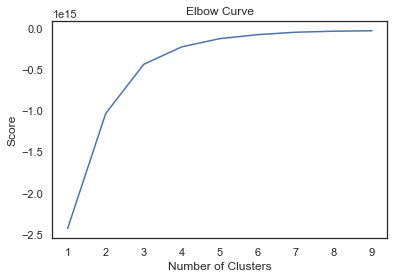

In [65]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [66]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [67]:
# Fit the k-means object to the data.

kmeans.fit(df_3)

C:\Users\Martin ARAUJO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [68]:
df_3['clusters'] = kmeans.fit_predict(df_3)

C:\Users\Martin ARAUJO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\conda_tmp/ipykernel_21748/1413470433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['clusters'] = kmeans.fit_predict(df_3)


In [69]:
df_3.head()

,Order Quantity,Gross_sales,Gross_cost,Net_Profit,Population_Store_location,Discount Applied,clusters
0,5,9815.5,5005.905,4809.595,213776,0.075,0
1,5,9547.5,4773.750,4773.750,258071,0.050,0
2,3,7477.2,3738.600,3738.600,213776,0.075,0
3,3,11798.7,6253.311,5545.389,474558,0.100,0
4,3,5266.2,3896.988,1369.212,213776,0.150,0


In [70]:
df_3['clusters'].value_counts()

0    7699
1     279
2      13
Name: clusters, dtype: int64

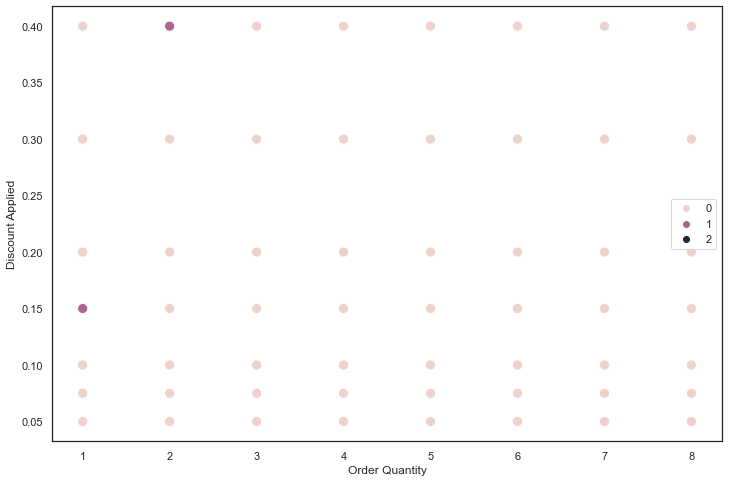

In [71]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['Order Quantity'], y=df_3['Discount Applied'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Order Quantity') # Label x-axis.
plt.ylabel('Discount Applied') # Label y-axis.
plt.show()

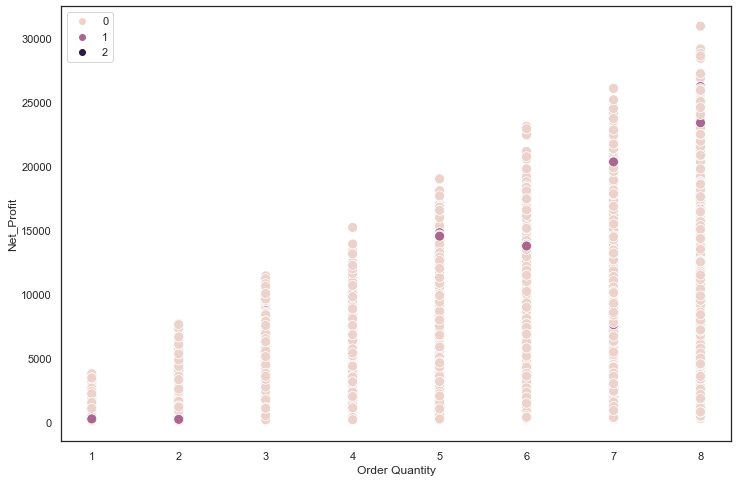

In [72]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['Order Quantity'], y=df_3['Net_Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Order Quantity') # Label x-axis.
plt.ylabel('Net_Profit') # Label y-axis.
plt.show()

In [73]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

C:\Users\Martin ARAUJO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [74]:
df_2['clusters'] = kmeans.fit_predict(df_2)

C:\Users\Martin ARAUJO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\conda_tmp/ipykernel_21748/1948498210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


In [75]:
df_2.head()

,Order Quantity,Gross_sales,Gross_cost,Net_Profit,Household Income,Population_Store_location,Discount Applied,clusters
0,5,9815.5,5005.905,4809.595,68789,213776,0.075,0
1,5,9547.5,4773.750,4773.750,110549,258071,0.050,0
2,3,7477.2,3738.600,3738.600,68789,213776,0.075,0
3,3,11798.7,6253.311,5545.389,156341,474558,0.100,0
4,3,5266.2,3896.988,1369.212,68789,213776,0.150,0


In [76]:
df_2['clusters'].value_counts()

0    7699
1     279
2      13
Name: clusters, dtype: int64

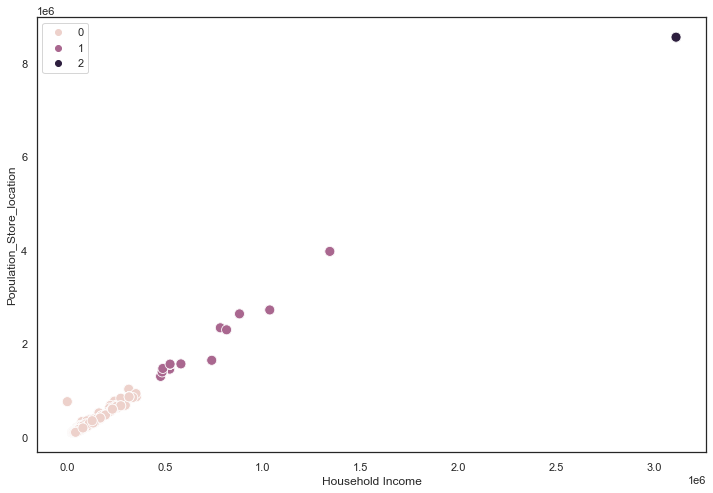

In [77]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Household Income'], y=df_2['Population_Store_location'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Household Income') # Label x-axis.
plt.ylabel('Population_Store_location') # Label y-axis.
plt.show()

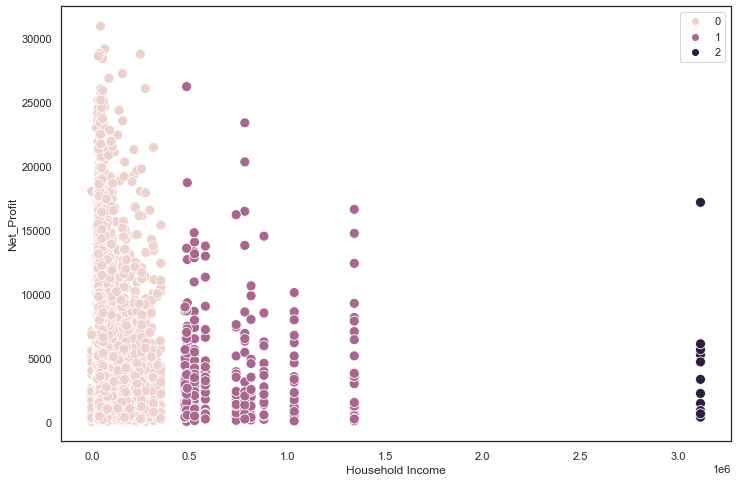

In [78]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Household Income'], y=df_2['Net_Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Household Income') # Label x-axis.
plt.ylabel('Net_Profit') # Label y-axis.
plt.show()

We can see clearly that a biggest household income it is not meaning that we can see an increase in net net profit of our company

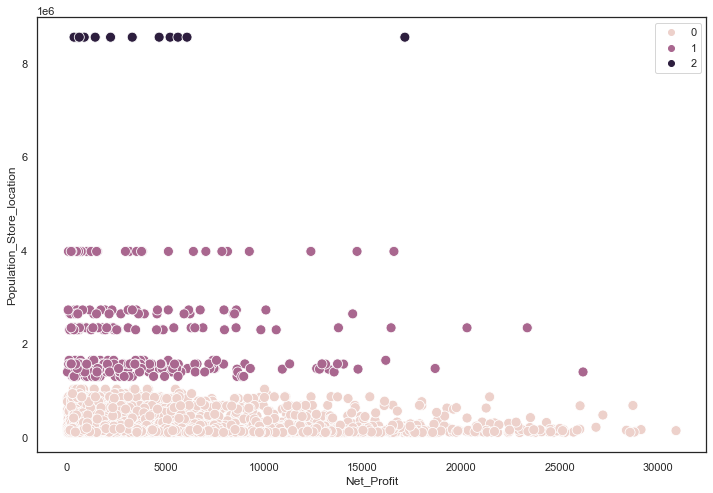

In [79]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Net_Profit'], y=df_2['Population_Store_location'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Net_Profit') # Label x-axis.
plt.ylabel('Population_Store_location') # Label y-axis.
plt.show()

Indeed, smaller populations generate more net profit to our company than larger populations

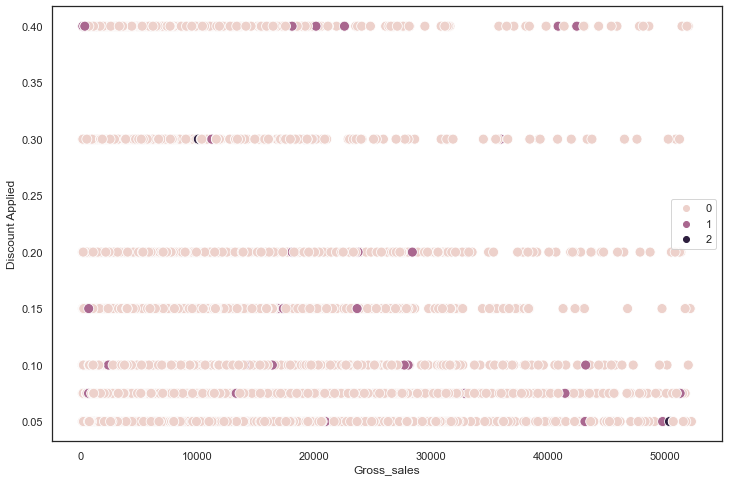

In [80]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Gross_sales'], y=df_2['Discount Applied'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Gross_sales') # Label x-axis.
plt.ylabel('Discount Applied') # Label y-axis.
plt.show()

I strongly believe that this dataset is lacking more variables, to analyze and predict the behavior of the sales, orders, prices, and cost. The dataset contains a lot of insightful variables, but are mostly categorical, which are not the best to use with machine learning.

In [81]:
df['Product Name'].groupby(df['Product Name']).count()

Product Name
Accessories           194
Audio                 152
Bakeware              175
Bar Tools             170
Baseball              170
Basketball            156
Bathroom Furniture    173
Bean Bags             147
Bedroom Furniture     152
Blankets              168
Candleholders         169
Candles               158
Clocks                170
Cocktail Glasses      195
Collectibles          179
Computers             154
Cookware              162
Dining Furniture      181
Dinnerware            166
Festive               165
Floor Lamps           164
Floral                168
Furniture Cushions    178
Home Fragrances       172
Mirrors               163
Ornaments             182
Outdoor Decor         166
Outdoor Furniture     157
Pendants              176
Phones                178
Photo Frames          173
Pillows               126
Platters              200
Rugs                  184
Sculptures            182
Serveware             200
Stemware              177
TV and video          180

In [82]:
df['OrderDate'].min()

Timestamp('2018-05-31 00:00:00')

In [83]:
df['OrderDate'].max()

Timestamp('2020-12-30 00:00:00')

In [84]:
#03 EXPORTING DATA
df.to_csv(os.path.join(path, '02- Data','Prepared Data', 'df.csv'))

In [85]:
#03 EXPORTING DATA
df_2.to_csv(os.path.join(path, '02- Data','Prepared Data', 'df_2.csv'))